# Введение в глубокое обучение

## Занятие 2. PyTorch, Градиентный спуск для обучения нейросети.


## PyTorch



PyTorch — это один из самых популярных на сегодняшний день фреймворков для глубокого обучения. "Популярный" в том плане, что на сегодняшний день большая часть кода, связанная с нейросетями, пишется на PyTorch. Таким популярным этот фреймворк сделало то, что с PyTorch очень удобно работать. Как мы увидим далее, работа с PyTorch очень похожа на работу с Numpy. Также у PyTorch очень удобные и информативные [документация](https://pytorch.org/docs/stable/index.html) и [туториалы](https://pytorch.org/tutorials/).

Небольшой экскурс по фреймворкам для глубокого обучения:

- **Caffee, Theano, Lasagne** — уже практически не используются;
- **Tensorflow** — фреймворк от Google, который был популярен до 2017-2018 года перед появлением PyTorch. В то время большинство кода, связанного с нейросетями, писалась на нем. Однако он был довольно сложен, поэтому PyTorch быстро перехватил лидерство.

    У Tensorflow есть также "обертка" Keras, которая позволяет более просто работать с нейросетями. Однако Keras менее гибок, чем PyTorch, поэтому не может полноценно его заменить.

    Также в 2019 году вышел Tensorflow 2.0, в котором работа с нейросетями была сильно упрощена. Но к тому моменту рынок уже захватил PyTorch, поэтому Tensorflow 2.0 популярен так и не стал.

- **PyTorch**;
- **JAX** — новый фреймворк от Google, призванный заменить Tensorflow.

### torch.Tensor

Базовой структурой фреймворка является структура, которая называется `torch.Tensor`. Tensor - это аналог `numpy.array`, многие методы работы с `torch.Tensor` в точности повторяют методы `numpy array`.

Тензор — это тот тип данных, с которыми работают все нейросети в PyTorch. Матрицы весов слоев сети — это тензоры. Данные, которые мы подаем на вход сети тоже обязательно должны быть приведены к типу `torch.Tensor`. Ну и выход сети, разумеется, тоже будет иметь тип `torch.Tensor`.

Импортируем библиотеку и рассмотрим типичные способы создания тензоров.

In [ ]:
import torch
import warnings
warnings.filterwarnings('ignore')

1. Тензоры можно создавать из листов, массивов и других контейнеров Python.

In [ ]:
x_list = [1., 2., 3.]
x_tensor = torch.tensor(x_list)
x_tensor

tensor([1., 2., 3.])

2. Тензоры можно создавать при помощи инициализирующих функций, как в `numpy`.

In [ ]:
zeros_tensor = torch.zeros(2, 3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
ones_tensor = torch.ones(2, 3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
eye_tensor = torch.eye(6)
eye_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

3. Вообще практически все методы, которые есть у Numpy массивов, есть и у torch.Tensor:

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

y_tensor = torch.tensor([
    [-10, 3],
    [5, -4]
])

In [ ]:
x_tensor + y_tensor

tensor([[-9,  5],
        [ 8,  0]])

In [ ]:
x_tensor @ y_tensor

tensor([[  0,  -5],
        [-10,  -7]])

In [ ]:
# аналог np.concatenate([x_tensor, y_tensor], axis=1)
torch.cat([x_tensor, y_tensor], dim=0)

tensor([[  1,   2],
        [  3,   4],
        [-10,   3],
        [  5,  -4]])

4. Тензоры можно переводить обратно в формат Numpy

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_numpy = x_tensor.numpy()
x_numpy

array([[1, 2],
       [3, 4]])

## Нейронная сеть на Pytorch

Давайте научимся создавать полносвязную нейросеть на Pytorch.

Нейронные сети в Pytorch создаются по типу конструктора: есть набор стандартных блоков из которых мы можем собрать итоговую модель. Простейшие из этих блоков — линейные слои и функции активации. В следующих занятиях мы познакомимся с новыми блоками, которые можно встраивать в архитектуру сети.

Давайте вспомним, как устроена полносвязная нейросеть.



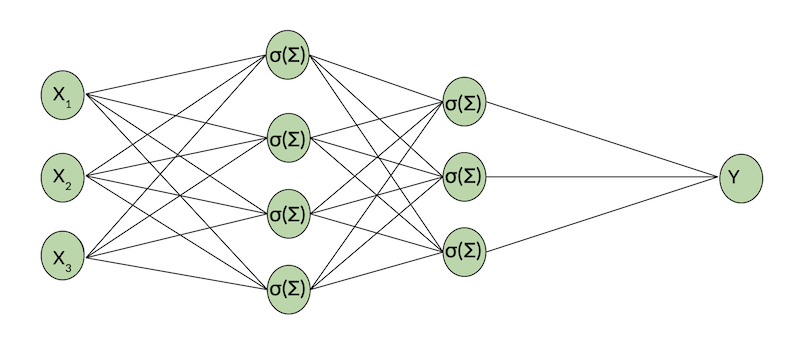

$$\widehat{y} = \sigma(W_3^T \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

Каждый полносвязный слой представляет из себя комбинацию линейного преобразования $\widehat{c} = WX + b$ и некоторой функции активации $\sigma(\widehat{c})$:
- Сначала входящий вектор $X$ умножается на матрицу $W$ и к результату прибавляется вектор байеса $b$:
    
    $$\widehat{c} = WX + b$$
- Далее полученный результат прогоняется через функцию активации. Полученный результат подается в качестве входного вектора следующему слою сети.
    $$\sigma(\widehat{c})$$

Нейросеть задается как список подобных преобразований, следующих друг за другом.

Давайте научимся задавать линейное преобразование и функцию активации. А затем скомбинируем их для создания полносвязной нейросети.

Слой, представляющий из себя линейное преобразование задаётся при помощи класса `torch.nn.Linear`. Давайте создадим слой с 5 входными и 3 выходными нейронами.

In [ ]:
import torch.nn as nn

n = 5
m = 3
linear_layer = nn.Linear(n, m)

In [ ]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

Далее — функция активации. Многие известные функции активации реализованы в модуле `nn` и продублированы в модуле `nn.functional`. Выберем какую-нибудь из них, например, гиперболический тангенс (tanh).

In [ ]:
import torch.nn.functional as F

# Можно использовать такой вариант
# activation = F.tanh
# или более правильный вариант:
activation = nn.Tanh()

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

**Замечание:** второй вариант объявления функции активации (сс помощью модуля nn) более предпочителен, т.к. использование функций напрямую из `torch.nn.functional` иногда может приводить к не вполне корректной работе сложных моделей. Безопаснее и правильнее использовать именно классы из `torch.nn`, однако очень часто на раличных ресурсах, посвященных  `Pytorch`, можно встретить использование объектов из `torch.nn.functional`, поэтому мы считаем нужным рассказать и о таком способе использования функций активации.

Теперь проход некоторого тензора с данными через такой полносвязный слой будет задан при помощи последовательности команд:

In [ ]:
random_input = torch.rand(5)

z = linear_layer(random_input)
output = activation(z)
output

tensor([ 0.7098, -0.0338,  0.3751], grad_fn=<TanhBackward0>)

Обратим внимание на `grad_fn=<TanhBackward0>`. Подобная приписка будет появляться на всех тензорах, которые являются обучающими параметрами в нейросети. Это значит, что для данного тензора в процессе обучения сети будет вычисляться градиент, с помощью которого значения тензора будут обновляться. Подробнее про процесс обучения сети мы поговорим далее в этом уроке.

Давайте теперь соберем нейросеть из блоков Linear и Tanh. Самый простой способ объединить несколько модулей в цепочку - это использование модуля `nn.Sequential`. Этот класс позволит нам объединить несколько модулей в один контейнер так, что в случае применения этого контейнера к некоторму тензору, вычисления будут проведены в том порядке, в котором мы передали элементы. То есть, так мы сможем получить нейросеть с последовательными слоями Linear и Tanh.

In [ ]:
FF_layer = nn.Sequential(
    linear_layer,
    activation
)
FF_layer(random_input)

tensor([ 0.7098, -0.0338,  0.3751], grad_fn=<TanhBackward0>)

Мы получили точно такой же результат, как и в ячейке выше. Давайте теперь таким же образом построим полносвязную нейросеть для решения какой-нибудь простой задачи. Например, попробуем смоделировать функцию косинуса.

### Полносвязная нейросеть для приближения функции косинуса

Прежде всего зададим одномерный датасет.

In [ ]:
X = torch.normal(mean=torch.zeros((1000, 1)), std= 2)
Y = torch.cos(X)

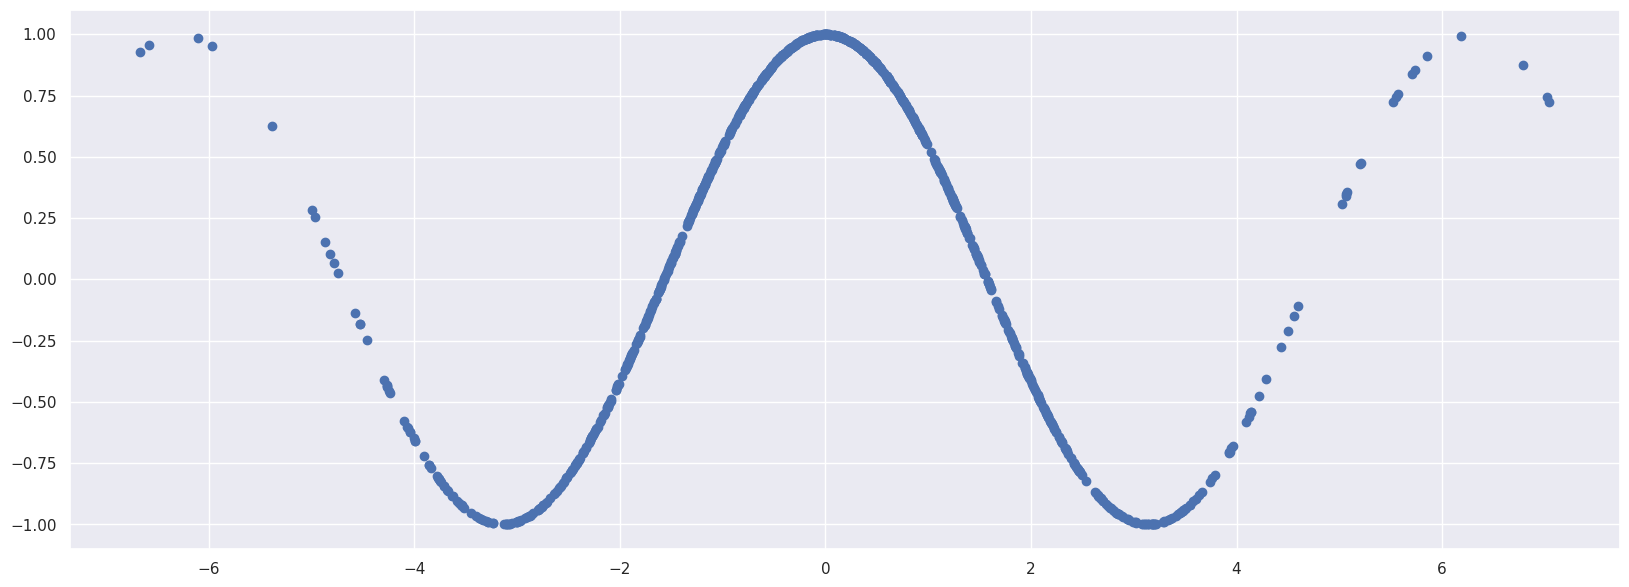

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(20,7))
plt.scatter(x=X, y=Y);

Давайте зададим нейронную сеть с тремя слоями. Пусть в скрытых слоях будет пять нейронов. В качестве функции активации выберем гиперболический тангенс, как и в примерах выше.

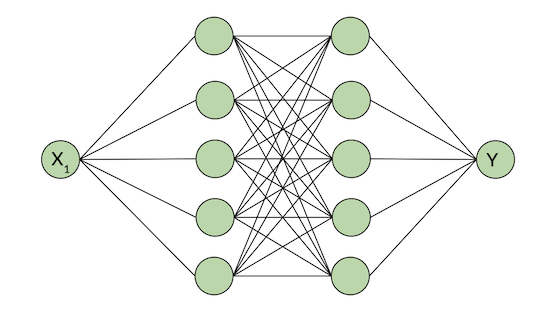

In [ ]:
import torch.nn as nn
NN = nn.Sequential(nn.Linear(1, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 1, bias=True),
                   nn.Tanh())

Посмотрим, что умеет наша необученная нейросеть:

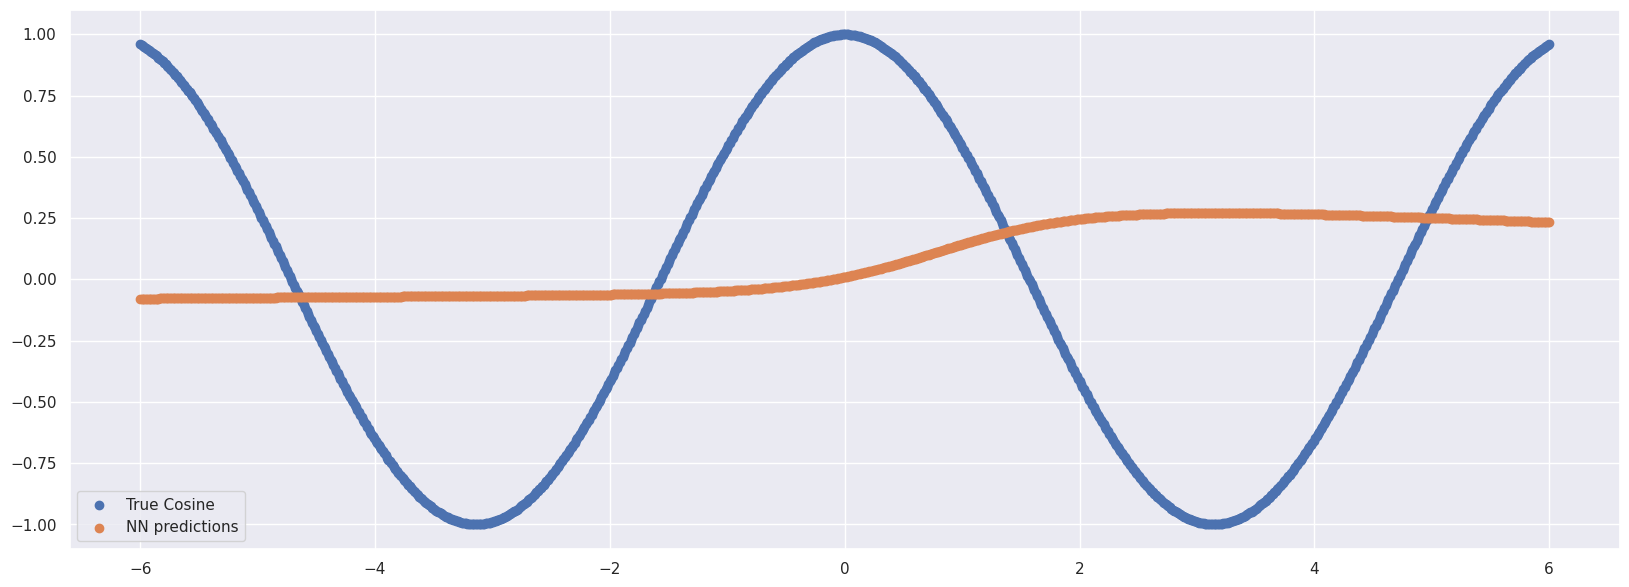

In [ ]:
X_test = torch.linspace(-6, 6, 1000)
Y_test = torch.cos(X_test)

nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True Cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');
plt.legend()

Полученный результат ожидаем, поскольку наша нейронная сеть не обучена. Давайте обучим её. Но сначала поговорим о том, как вообще это можно сделать.


**Замечание 1:** в 4 строке предыдущей ячейки мы воспользовались функцией `.view()`. `.view()` - это альтернатива функции `.reshape()`, позволяющая изменить размерность тензора без изменения данных в нём. Здесь мы применили её для того, чтобы сделать из вектора входных данных длины $n$ матрицу размера $(n, 1)$. Эта формальность необходима для корректного прохода тензора через наши преобразования. Дело в том, что нейросеть (и любые другие модели машинного обучения) принимают на вход данные в виде матрицы размера $(n, k)$, где $n$ — количество элементов данных, $k$ — количество признаков у каждого элемента данных. У нас же у каждого элемента 1 признак (его координата по оси ОХ). И мы как бы делаем матрицу элементы-признаки, в которой $n$ элементов, и у каждого элемента 1 признак.

**Замечание 2:** в 5 строке мы выполнили комбинацию методов тензора `.detach().numpy()`. Функция `.detach()` нужна для извлечения тензора из графа вычислений нейросети. Грубо говоря, выход нейросети все еще является частью графа вычислений сети, и чтобы перевести этот тензор в numpy, нужно сначала отделить его от графа сети.

## Обучение нейронных сетей



Нейронные сети обучаются при помощи алгоритма градиентной оптимизации. Идея таких алгоритмов основана на последовательном вычислении градиентов (частных производных) лосс-функции по весам сети и обновлении весов сети.

Сейчас мы последовательно разберем идею алгоритма градиентной оптимизации.


Вспомним для начала, что наша цель при обучении нейросети — подобрать такие гиперпараметры сети, чтобы среднее значение выбранной лосс-функции было минимально в среднем на обучающем датасете.

Например, возьмем датасет с прошлого занятия:

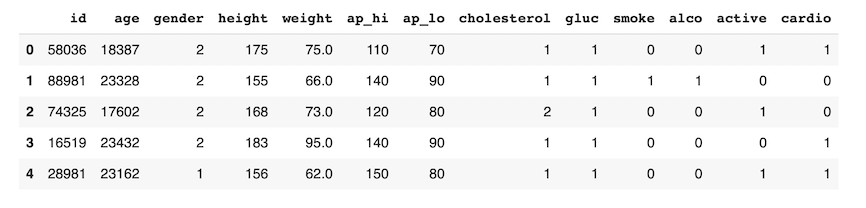

Пусть мы выбрали лосс-функцию $L$, которую мы хотим минимизировать на наших данных.

Тогда задача обучения сети — найти такие параметры сети $W_1, b_1, W_2, b_2, \dots$, что среднее значение лосс-функции на элементах тренировочного датасета минимально: $$loss = \frac{\sum_{i=1}^n L(y_i, \widehat{y}_i)}{n} \to min$$

, где $n$ — количество элементов в данных, $y_i$ — верное значение целевой переменной для $i$-ого элемента данных,  $\widehat{y}_i$ — ответ модели для $i$-ого элемента данных.

Давайте еще раз посмотрим на нейросеть и поймем, что ее формулу можно рассматривать как функцию от ее параметров ($W_i$ и $b_i$)

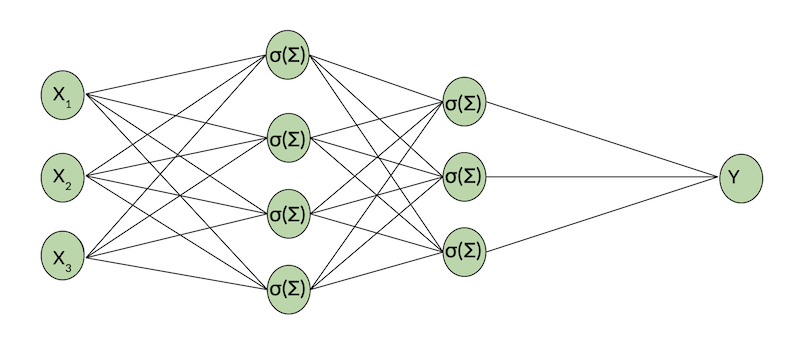

$$\widehat{y} = \sigma(W_3^T \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

Подставив эту формулу для $\widehat{y}$ в формулу $loss$, получим:

$$loss = \frac{\sum_{i=1}^n L(y_i, \sigma(W_3 \sigma(W_3^T \sigma(W_1^TX_i + b_1 ) + b_{2}) + b_{3}))}{n} \to min$$

Получается, $loss$ — это функция от параметров сети $W_i$ и $b_i$. И при обучении сети стоит задача минимизации функции многих переменных, т.е. задача нахождения таких значений $W_1, b_1, W_2, b_2, W_3, b_3$, что значение $loss$ для них — минимально.

**Как можно решить задачу минимизации функции?** На курсе по ML мы разбирали идею **градиентного спуска**. Кратко напомним её.

Для начала мы разберем способы решения задачи минимизации функции и алгоритм градиентного спуска для функции одной переменной. Затем обобщим его для функций многих переменных.
______________________

# Напоминание: градиентный спуск

### Минимизация функции одной переменной

Здесь мы поговорим о способах решения задачи минимизации функции одной переменной

Первый способ — аналитический. Для многих функций точку минимума можно найти, приравняв производную к нулю.

$$y = x^3 - 3x - 4$$
$$\frac{dy}{dx} = 3x^2-3$$
$$x_{min} = \{-1, 1\}$$

Однако такой способ работает не для всех функций даже одной переменной. Что уж говорить о функциях многих переменных.

$$y = x^{10} - 3x^7 - 4x^3 + 4x$$
$$\frac{dy}{dx} = 10x^9-21x^6 -12x^2 + 4$$
$$x_{min} = \ ?$$

Здесь нам на помощь приходят два свойства частной производной. Для функции одной переменной эти свойства можно сформулировать так:

1. Знак производной в точке показывает, возрастает или убывает функция в этой точке;
2. Модуль значения производной говорит о скорости роста/убывания функции в точке. Чем выше модуль значения f’(x), тем выше скорость убывания/возрастания функции f в точке х.

Давайте проиллюстрируем эти свойства. Рассмотрим функцию одной переменной $$f(x) = x^4 + 5x^3 - 10x$$

Ее производная:
$$\frac{df}{dx} = 4x^3 + 15x^2 - 10$$

Посчитаем значение производной в точках -5, -3.55, -2:

$$\frac{df}{dx}(-5) = -135$$
$$\frac{df}{dx}(-3.55) = ~0$$
$$\frac{df}{dx}(-2) = 18$$

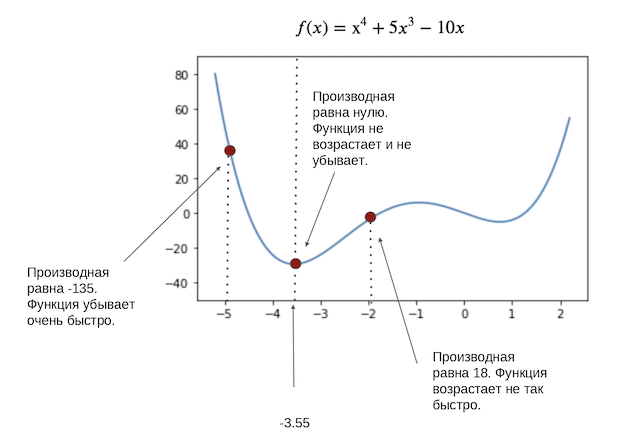

Получается, **вычислив производную функции в точке $x$, мы знаем, в какую сторону нужно сдвинуться от точки $x$, чтобы значение функции уменьшилось**.

Это свойство мы можем использовать для поиска минимума функции. Идея возникает такая: давайте выберем случайную точку, например, $x=5$. Вычислим значение производной функции в этой точке. По знаку производной поймем, куда надо сдвинуться, чтобы прийти в точку минимума. И будем туда двигаться.

Однако есть проблема: мы знаем, в какой стороне лежит точка минимума, но не знаем, насколько она далеко. То есть, мы не знаем, на сколько нужно сдвинуться от текущей точки, чтобы прийти в точку минимума.

Можно пытаться делать так: зафиксировать величину шага, скажем, $\delta x = 1$. Выбрать случайную точку, например, $x=5$. Вычислить значение производной функции в этой точке. По знаку производной понять, куда надо сдвинуться, чтобы прийти в точку минимума. Сдвинуться в этом направлении на величину шага $\delta x$. В новой точке снова вычислить значение производной функции. Снова понять, куда теперь надо сдвинуться, чтобы прийти в точку минимума. Сдвинуться туда на $\delta x$. И т.д.

Но такая идея довольно неэффективна. На то есть минимум две причины:
1. Иногда начальная точка настолько далеко от точки минимума, что чтобы дойти до точки минимума, придется сделать очень большое количество шагов;
2. Иногда начальная точка (или точка, в которую мы пришли в течение алгоритма) настолько близко к точке минимума, что при шаге в величину $\delta x = 1$ мы "перепрыгнем" через точку минимума.



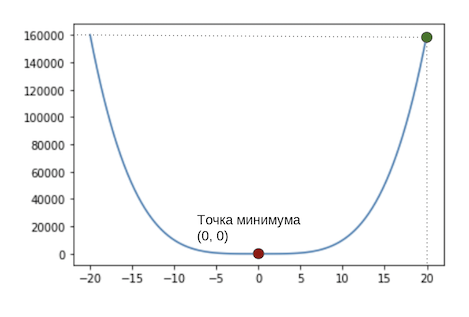

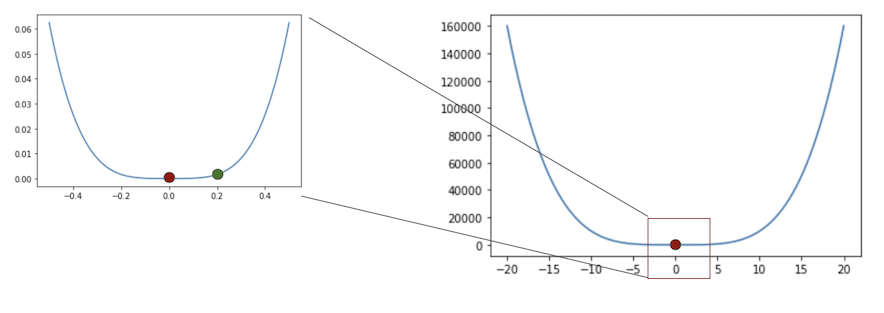

Тут нам поможет второе упомянутое свойство производной: что модуль значения производной говорит о скорости роста/убывания функции в точке. Идея тут тогда такая: давайте каждый раз сдвигаться не на $\delta x = 1$, а на $\delta x = alpha*\frac{df}{dx}$. Тогда мы будем двигаться на больший шаг, когда мы будем далеко от точки минимума, и на меньший шаг, если будем близко к точке минимума.

Тогда **алгоритм градиентного спуска для функции одной переменной** будет выглядеть так:

1. Выбираем случайную начальную точку $x$. Выбираем значение шага градиентного спуска $\alpha$
2. Пока не будет выполнен критерий остановки, делаем следующее:
    - вычисляем значение $f(x)$ для текущей точки $x$;
    - вычисляем значения производной $\frac{d f}{d x}$;
    - двигаемся к новой точке:
    $$x = x - \alpha \frac{df}{dx}$$

Критерий остановки может быть разным. Например, если значение производной в текущей точке (и, соответственно, шаг градиентного спуска) стало очень малым.

### Минимизация функции многих переменных

Для функции двух и более переменных частные производные по каждой из переменных имеют те же свойства:

1. Знак частной производной по переменной $x_1$ в точке показывает, возрастает или убывает функция в этой точке *по переменной $x_1$*;
2. Модуль значения частной производной по переменной $x_1$ говорит о скорости роста/убывания функции в точке *по переменной $x_1$*. Чем выше модуль значения $f’_{x_1}(x)$, тем выше скорость убывания/возрастания функции f *по переменной $x_1$* в точке х.

Например, рассмотрим функцию двух переменных $$f(x_1, x_2) = 3x_1^2 + 2x_1x_2$$

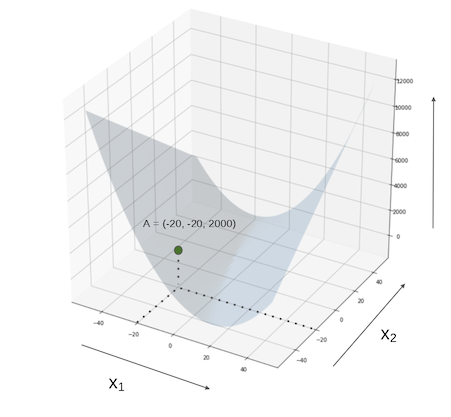

Ее частная производная по $x_1$:
$$\frac{df}{dx_1} = 6x_1 + 2x_2$$
И ее значение в точке x = (-20, -20):
$$\frac{df}{dx_1}(-20, -20) = 6 \cdot (-20) + 2\cdot (-20) = -160$$

Получается, вычислив частную производную функции в точке $x$ по переменной $x_1$, мы знаем, в какую сторону нужно сдвинуться от точки $x$ по переменной $x_1$, чтобы уменьшить значение функции.

Тогда **алгоритм градиентного спуска для функции многих переменной** будет выглядеть так:

1. Выбираем случайную начальную точку $x = (x_1, x_2, ..., x_n)$. Выбираем значение шага градиентного спуска $\alpha$
2. Пока не будет выполнен критерий остановки, делаем следующее:
    - вычисляем значение функции в текущей точке $f(x)$
    - вычисляем значение производной $\frac{d f}{d x_i}(x)$;
    - двигаемся к новой точке:
    $$x_i = x_i - \alpha \frac{df}{dx_i}(x)$$

Алгоритм называется градиентным спуском, потому что вектор частных производных функции $\nabla f = (\frac{df}{dx_1}, \frac{df}{dx_2}, ..., \frac{df}{dx_n})$ называется градиентом функции f. И в шаге номер два происходит обновление градиента:
$$x = x - \alpha \nabla f$$
______________________________

### Обучение нейросети с помощью градиентного спуска

Давайте еще раз посмотрим на формулу нейросети. Мы уже поняли, что формулу лосса для нейросети можно рассматривать как функцию многих переменных от весов сети.

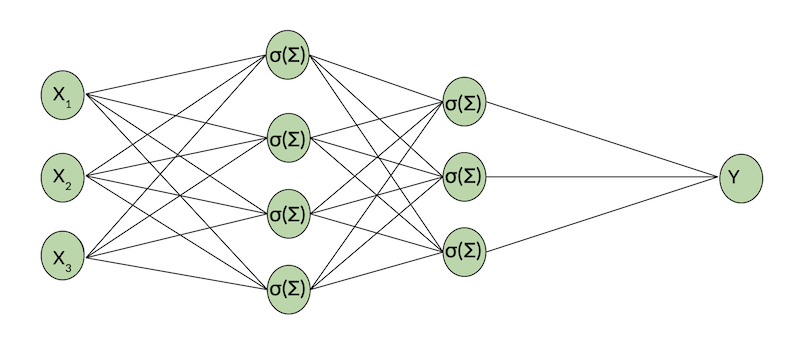

$$\widehat{y} = \sigma(W_3^T \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

$$loss = \frac{\sum_{i=1}^n L(y_i, \sigma(W_3 \sigma(W_3^T \sigma(W_1^TX_i + b_1 ) + b_{2}) + b_{3}))}{n} \to min$$

Тогда **алгоритм градиентной оптимизации для нейросети** выглядит следующим образом:

1. Инициализируем все веса сети $W_i$ и $b_i$ случайными значениями. Выбираем значение шага градиентного спуска $\alpha$
2. Пока не будет выполнен критерий остановки, делаем следующее:
    - вычисляем значение $loss$ c текущими значениями параметров $W_i$ и $b_i$;
    - вычисляем значения частных производных $\frac{\partial loss}{\partial W_i}$, $\frac{\partial loss}{\partial b_i}$;
    - обновляем значения параметров сети:
    $$W_i = W_i - \alpha \frac{\partial loss}{\partial W_i}, \ \ b_i = b_i - \alpha \frac{\partial loss}{\partial b_i}$$

Этот алгоритм лежит в основе обучения всех нейросетей, с которыми мы познакомимся на этом курсе. У него есть много вариаций, улучшающих поведение алгоритма во многих ситуациях, но идея остается той же.

Как именно вычисляются производные $\frac{\partial L}{\partial W_i}$ и $\frac{\partial L}{\partial b_i}$, мы разбирать не будем. Остановимся на том, что вычислить их возможно. Вы можете узнать подробнее о том, как они вычисляются, из дополнительных материалов к модулю. Стоит только сказать, что алгоритм вычисления частных производных $\frac{\partial L}{\partial W_i}$ и $\frac{\partial L}{\partial b_i}$ называется **алгоритмом обратного распространения ошибки**, или **backpropagation**.

А мы перейдем к обучению нашей нейросети для приближения функции косинуса на PyTorch.

## Обучение нейронной сети в Pytorch

Алгоритм вычисления частных производных лосс-функции по весам сети реализован внутри PyTorch. Нам не нужно писать его код.

Давайте напишем функцию `train` для обучения нейронной сети.

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения. Т.е. число градиентных шагов,
                    которые будут выполнены для каждого объекта в выборке
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания нашей модели
        y_pred = model(X)

        # Посчитаем значение функции потерь  на полученном предсказании
        loss = criterion(y_pred, y)

        # Обнулим посчитанные ранее значения градиентов
        optimizer.zero_grad()
        # Выполним подсчёт новых градиентов
        loss.backward()
        # Выполним шаг градиентного спуска
        optimizer.step()

    return model

Снова объявим нашу сеть:

In [ ]:
NN = nn.Sequential(nn.Linear(1, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 1, bias=True),
                   nn.Tanh())

Объявим лосс-функцию и оптимизатор, и обучим сеть на 30 эпохах:

In [ ]:
# лосс-функция
criterion = torch.nn.MSELoss()
# оптимизатор
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-2)

NN = train(NN, X, Y, criterion,optimizer, 30)

  0%|          | 0/30 [00:00<?, ?it/s]

Посмотрим теперь, каков будет результат.

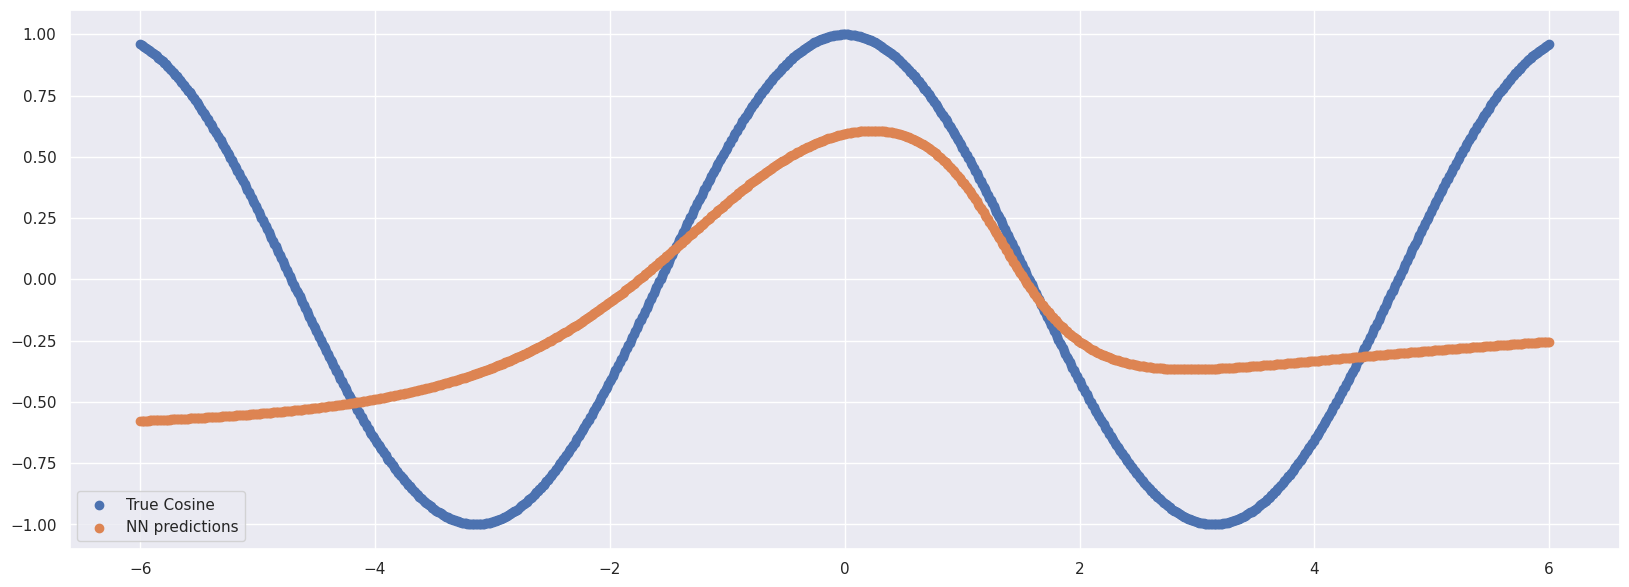

In [ ]:
nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True Cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');
plt.legend()

Стало заметно лучше, но явно требуется еще несколько итераций обучения.

In [ ]:
NN = train(NN, X, Y, criterion, optimizer, 15)

  0%|          | 0/15 [00:00<?, ?it/s]

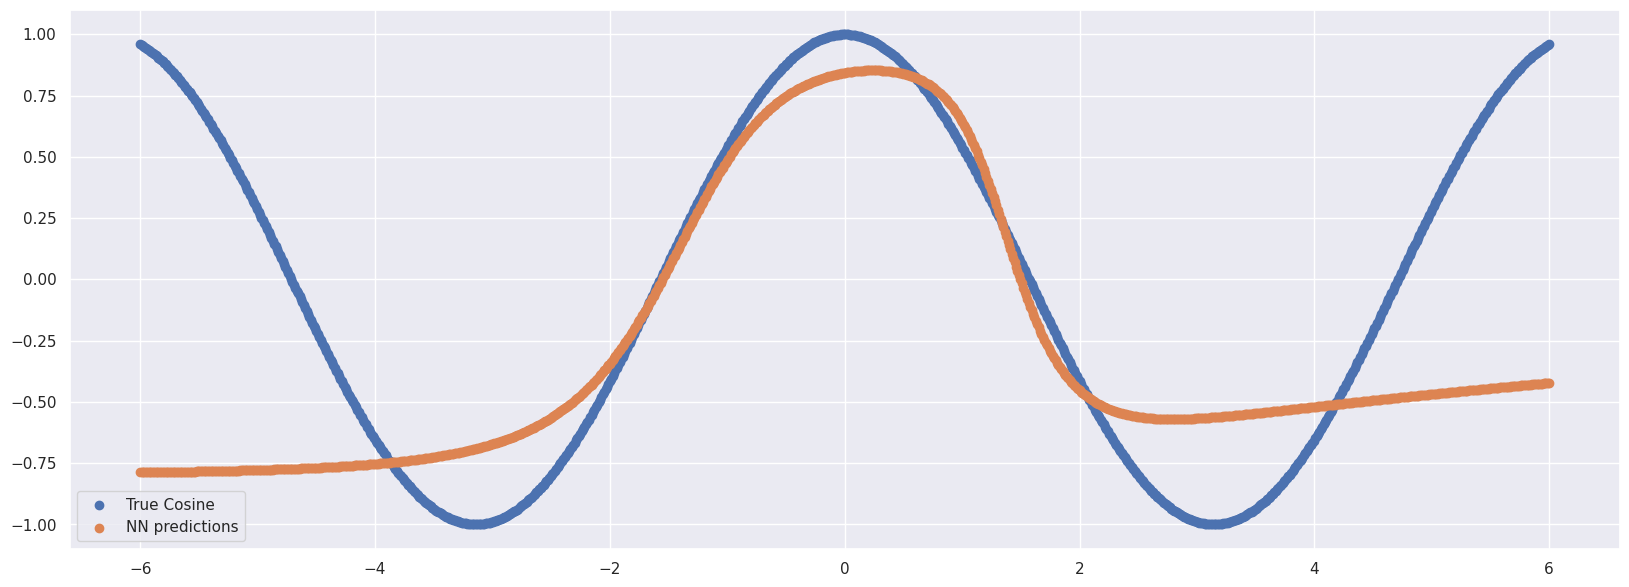

In [ ]:
nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True Cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');
plt.legend()

Один из возможных вариантов улучшения сходимости - это уменьшение градиентного шага. Давайте понизим его до 0.001 и выполним еще несколько итераций обучения.

In [ ]:
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-3)

NN = train(NN, X, Y, criterion,optimizer, 50)

  0%|          | 0/50 [00:00<?, ?it/s]

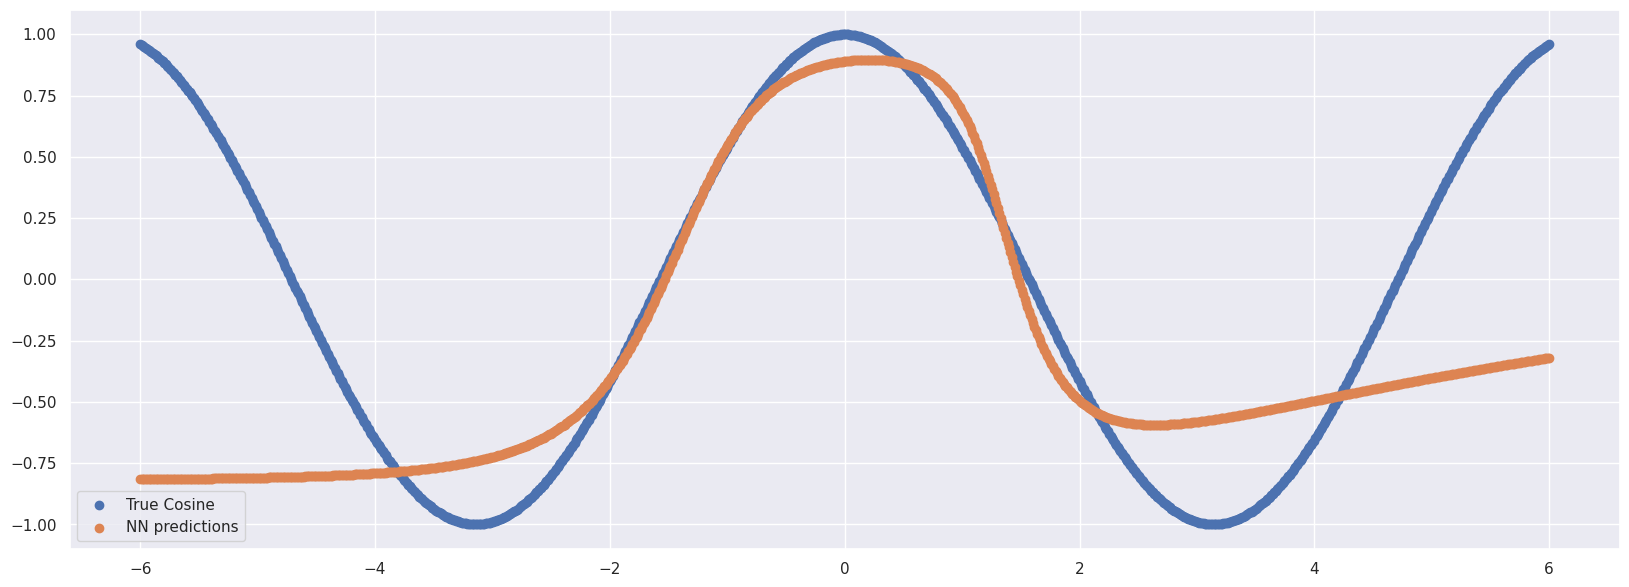

In [ ]:
nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True Cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');
plt.legend()

Результат стал существенно лучше.

Мы видим несовершенство аппроксимации на краях графика, это связано прежде всего с тем, что в нашей исходной выборке координаты взяты из нормального распределения, поэтому объектов, лежащих за пределами границ -3 и +3 очень мало, а значит мало прецедентов, по которым обучается наша нейронная сеть.

## Наследование от класса nn.Module

Давайте еще раз посмотрим на то, как мы задавали нашу нейросеть:

In [ ]:
NN = nn.Sequential(nn.Linear(1, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 1, bias=True),
                   nn.Tanh())

Иногда такой простой структуры как `Sequential` недостаточно для создания достаточно сложных моделей. Иногда это связано с тем, что в вычислениях нужно создать несколько независимых веток, иногда - с необходимостью логировать историю вычислений. Могут быть и другие причины. В любом случае хотелось бы иметь возможность вмешиваться в результаты промежуточных вычислений. Для этого существует более гибкий способ работать с нейронными сетями в Pytorch - это написание собственных классов, унаследованных от класса `nn.Module`.

Описание прямого прохода через такой блок происходит в форме спецификации функции `forward`.

In [ ]:
class Net(nn.Module):
    def __init__(self, dim=1):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(dim, 5)
        self.tanh1 = nn.Tanh()

        self.fc2 = nn.Linear(5, 5)
        self.tanh2 = nn.Tanh()

        self.fc3 = nn.Linear(5, 1)
        self.tanh3 = nn.Tanh()


    def forward(self, x):

        x = self.fc1(x)
        x = self.tanh1(x)

        x = self.fc2(x)
        x = self.tanh2(x)

        x = self.fc3(x)
        x = self.tanh3(x)
        return x

In [ ]:
NN = Net(1)

Обучить такую модель можно точно также - при помощи уже имеющейся у нас функции `train`

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-4)

NN = train(NN, X.view(-1, 1), Y, criterion,optimizer, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

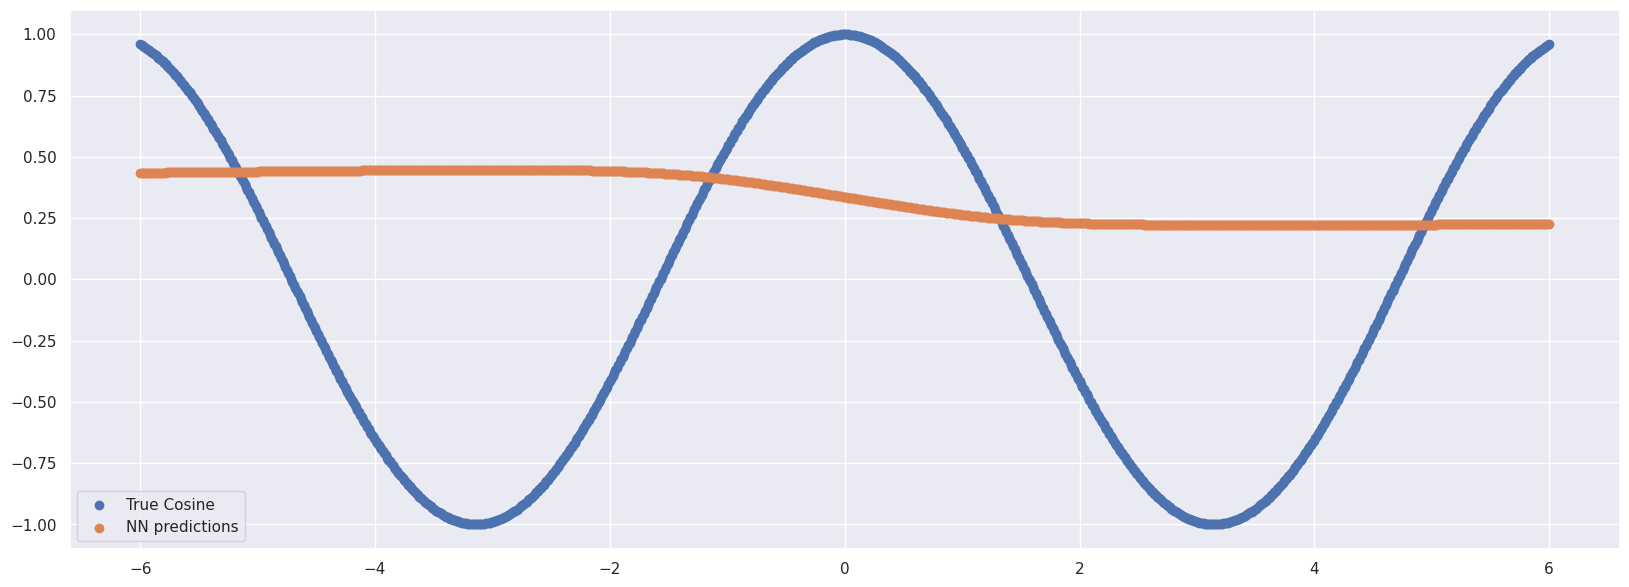

In [ ]:
nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True Cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');
plt.legend()

Наследование от класса `nn.Module` позволяет реализовать совместимость нашей модели с интерфейсом `Pytorch`, а также использовать некоторые дополнительные возможности. К примеру, мы можем получить доступ к параметрам модели в матричном виде:

In [ ]:
for param in NN.parameters():
  print('parameter shape: ', param.shape)

parameter shape:  torch.Size([5, 1])
parameter shape:  torch.Size([5])
parameter shape:  torch.Size([5, 5])
parameter shape:  torch.Size([5])
parameter shape:  torch.Size([1, 5])
parameter shape:  torch.Size([1])


## Перенос вычислений на видеокарту

Использование графических ядер - обязательный атрибут работы с глубокими нейронными сетями. Графические ядра позволяют производить быстрые эффективные параллельные вычисления. В `Pytorch` реализован интерфейс переноса вычислений на видеокарту. Для осуществления этого переноса необходимо перенестина видеокарту как параметры модели, так и входные данные.

Прежде всего нужно проверить, доступна ли видеокарта для вычислений. В google-colab для этого нужно в главном меню выбрать вкладку "Среда выполнения", там выбрать команду "Сменить среду выполнения", далее в качестве аппаратного ускорителя выбрать "GPU". После этого можно воспользоваться следующей командой для проверки доступности GPU:

In [ ]:
import torch
# эта команда проверяет, доступен ли GPU
torch.cuda.is_available()

False

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Теперь можем провести вычисления на GPU. Перенос тензоров и модулей на GPU производится при помощи функций `.to(device)`, либо `.cuda()`

**Замечание:** мы вынуждены продублировать определения основных функций, поскольку после подключения аппаратного ускорителя среда выполнения перезагружается

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(dim, 5)
        self.tanh1 = nn.Tanh()

        self.fc2 = nn.Linear(5, 5)
        self.tanh2 = nn.Tanh()

        self.fc3 = nn.Linear(5, 1)
        self.tanh3 = nn.Tanh()


    def forward(self, x):

        x = self.fc1(x)
        x = self.tanh1(x)

        x = self.fc2(x)
        x = self.tanh2(x)

        x = self.fc3(x)
        x = self.tanh3(x)
        return x

In [ ]:
NN = Net(1)
NN = NN.to(device) #для переноса на девайс

In [ ]:
NN

Net(
  (fc1): Linear(in_features=1, out_features=5, bias=True)
  (tanh1): Tanh()
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (tanh2): Tanh()
  (fc3): Linear(in_features=5, out_features=1, bias=True)
  (tanh3): Tanh()
)

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения. Т.е. число градиентных шагов,
                    которые будут выполнены для каждого объекта в выборке
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания нашей модели
        y_pred = model(X.to(device))

        # Посчитаем значение функции потерь  на полученном предсказании
        loss = criterion(y_pred, y.to(device))

        # Обнулим посчитанные ранее значения градиентов
        optimizer.zero_grad()
        # Выполним подсчёт новых градиентов
        loss.backward()
        # Выполним шаг градиентного спуска
        optimizer.step()

    return model

Снова заведем данные для косинуса:

In [ ]:
X = torch.normal(mean=torch.zeros((1000, 1)), std= 2)
Y = torch.cos(X)

Обучим нейронную сеть на GPU

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-2)

NN = train(NN, X, Y, criterion,optimizer, 50)

  0%|          | 0/50 [00:00<?, ?it/s]

Теперь для конвертации тензора в формат тгьзн к набору команд `.detach().numpy()` мы должны добавить еще одну команду - `.cpu()`

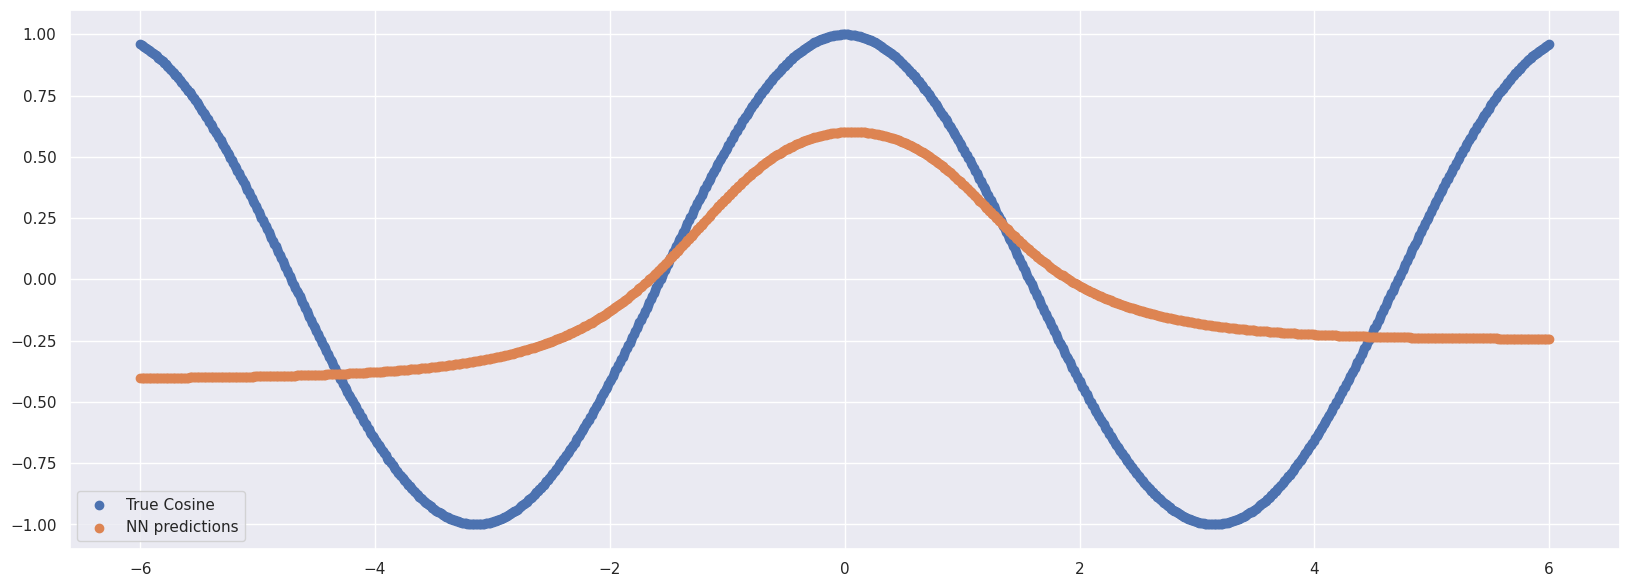

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

X_test = torch.linspace(-6, 6, 1000).to(device)
Y_test = torch.cos(X_test)

nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.cpu().detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test.cpu(), y=Y_test.cpu(), label='True Cosine');
plt.scatter(x=X_test.cpu(), y=nn_prediction, label='NN predictions');
plt.legend()

# Разные оптимизаторы в Pytorch

Оказывается, что на основе базовой идеи градиентного спуска на сегодняшний день придумано очень много продвинутых алгоритмов градиентной оптимизации. Многие из них реализованы в `pytorch`. Вот краткий список таких алгоритмов, реализованных в виде классов в модуле `torch.optim`:
- `ADAM` (adaptive gradients with momentum) - де-факто метод оптимизации, используемый по умолчанию. В большинстве задач на практике показывает себя лучшим оптимизатором при прочих равных. Класс в `pytorch`: `torch.optim.Adam`
- `Adagrad` (Adaptive subgradient) - метод, самостоятельно подбирающий "длину шага" градиентного спуска. Класс в `pytorch`: `torch.optim.Adagrad`
- `RMSProp` - еще один метод, адаптирующий множитель перед градиентом в зависимости от истории обучения. Класс в `pytorch`: `torch.optim.RMSprop`
- `Adadelta` - алгоритм, напоминающий adagrad. Класс в `pytorch`: `torch.optim.Adadelta`

В Pytorch есть множество других оптимизаторов. Еще раз повторим, что `Adam` в подавляющем большинстве практических применений демонстрирует наилучший результат. Но иногда имеет смысл попробовать несколько разных оптимизаторов. В документации к каждому из этих классов Вы можете найти ссылки на соответствующие статьи.

## Дополнительные материалы

### Полезные ссылки

Сюда подходят все те ссылки, которые были к первому занятию:



- "[Создаем нейронную сеть](https://www.litres.ru/book/tarik-rashid/sozdaem-neyronnuu-set-54815634/)" (Рашид Т.) — книга, в которой в первых главах отлично объяснено устройство полносвязной нейросети и принцип ее обучения.
- Цикл лекций "Введение в Нейронные сети" в Deep Learning School:
    - [История развития Deep Learning](https://youtu.be/ZfXpX8tMg-w?feature=shared);
    - [Устройство нейросети. Механизм обратного распространения ошибки](https://youtu.be/-yiq1DRX9K0?feature=shared).
    - [Полносвязная нейросеть](https://www.youtube.com/watch?v=O0nGKKFyYT4&list=PL0Ks75aof3Tiru-UvOvYmXzD1tU0NrR8V&index=29)
    - [Функции активации](https://youtu.be/3F7rydcAa0w?feature=shared)
- [Курс "ИИ Старт"](https://stepik.org/course/125587/syllabus) на Stepik (бесплатный). В его первых модулях — основы Python, математики для ML и машинного обучения.
- Colab-ноутбуки с [ликбезом по производной](https://colab.research.google.com/drive/1Etz36ELaIoqOoDR_gbLVn3HsMfxtbK2Q?usp=sharing) и [ликбезом по градиентной оптимизации](https://colab.research.google.com/drive/1I73AiHtN0XvXCgCMj1oLKZTNw4CRDdTL?usp=sharing)


И еще пара дополнительных:

- [Оптимизаторы, их принцип действия и нюансы](https://habr.com/ru/companies/skillfactory/articles/552394/);
- [Различные оптимизаторы](https://www.youtube.com/watch?v=lRWiWwS11Yo)